![Practicum AI Logo image](images/practicum_ai_logo.png) <img src='images/practicumai_deep_learning.png' alt='Practicum AI: Deep Learning Foundations icon' align='right' width=50>

***
# *Practicum AI:* Deep Learning - MNIST Classifier

This exercise adapted from Baig et al. (2020) <i>The Deep Learning Workshop</i> from <a href="https://www.packtpub.com/product/the-deep-learning-workshop/9781839219856">Packt Publishers</a> (Exercise 2.07, page 92).

## Amelia's AI Adventure Continues...

<img alt="A cartoon of Dr. Amelia's dog looking at a computer with a stack of papers next to it showing some handwritten digits." src="images/Amelias_Dog_MNIST.jpg" padding=20 align="right" width=250>Amelia and her nutrition studies are back! After her adventures with image recognition and binary classification, she's curious to dive deeper. 

While Amelia's data collection process is working for most participants in her study, some do not like using the phone application to submit their survey responses. They keep sending in handwritten responses. Realizing that the data from these study participants is still vital to her research, Dr. Amelia is now looking to automate entering these responses using a program to read the numbers that make up the survey responses.

Again, Amelia decides to start with the basics: recognizing handwritten numbers. That's where the MNIST dataset comes in. With its vast collection of handwritten digits, it's the perfect training ground for Amelia's next AI venture.

**Note:** The cartoon of Dr Amelia's dog was generated with AI's assistance.

Training a model on the MNIST dataset is often considered the "Hello world!" of AI. It is a commonly used first introduction to image recognition with deep learning.


![AI Application Development Pathway model](https://github.com/PracticumAI/deep_learning_2_draft/blob/main/M3-AppDev.00_00_22_23.Still001.png?raw=true)

 >&#128221; While you're going through this notebook, see if you can figure out which steps here are associated with each of the steps of the Development Pathway.

## MNIST Handwritten Digit Classification Dataset

The [MNIST](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) training dataset contains 60,000 28×28 pixel grayscale images of handwritten single digits between 0 and 9, with an additional 10,000 images available for testing. 

The MNIST dataset is frequently used in machine learning research and has become a standard benchmark for image classification models. Top-performing models often achieve a classification accuracy above 99%, with an error rate between 0.4% and 0.2% on the hold-out test dataset.

In this exercise, you will implement a deep neural network (multi-layer) capable of classifying these images of handwritten digits into one of 10 classes. 

Amelia knows that to start any AI project, she'll need the right tools. She begins by importing the necessary libraries to set the stage for her digit-reading neural network.

## 1. Import libraries

Import the necessary libraries.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms
import pytorch_lightning as pl
from pytorch_lightning import Trainer

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt  # Import the matplotlib library for plotting and visualization.
# This line allows for the display of plots directly within the Jupyter notebook interface.
%matplotlib inline

## 2. Load the MNIST dataset

Amelia will need to import the MNIST dataset from PyTorch's [torchvision.datasets module](https://pytorch.org/vision/stable/datasets.html#mnist). The `train_features` and `test_features` variables contain the training and test images, while `train_labels` and `test_labels` contain the corresponding labels for each item in those datasets.  

```python
# Define transforms to convert PIL images to tensors and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

# Load the MNIST dataset from torchvision
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Extract features and labels for compatibility with the rest of the notebook
train_features = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()
test_features = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()
```

In [4]:
# Code it!
# Define transforms to convert PIL images to tensors and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

# Load the MNIST dataset from torchvision
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Extract features and labels for compatibility with the rest of the notebook
train_features = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()
test_features = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

## 3. Visualize the data

Before we start to work with data, it is always good to get a better idea of what we are working with.

How many images do we have in our training and testing datasets? (Hint, remember the `len()` function.)

In [5]:
# Code it!
print(f"Training images: {len(train_features)}")
print(f"Test images: {len(test_features)}")
print(f"Image shape: {train_features[0].shape}")

Training images: 60000
Test images: 10000
Image shape: (28, 28)


Let's have a look at a random image.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  61 195 160 196  77  15   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 125 242 249 230 254 254 194  44   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  19 237 254 148  21 247 254 254 216  94   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 141 254 216  13   0  22  85 160 254 254 137   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79 233 254 162   0   0   0   0   1 110 25

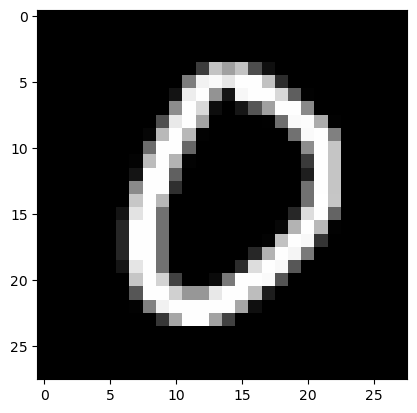

The true label for this image is a 0.


In [6]:
# Set line width for numpy array printing
np.set_printoptions(linewidth=150)

# Select a random number from train_features
select = np.random.randint(0,len(train_features))

# Print the image array - longer line length above should allow it to have all 28 rows in 1 line
print(train_features[select])

# Display the image as an actual image
plt.imshow(train_features[select], cmap='gray')
plt.show()

# Print the true label for the image from train_labels
print(f"The true label for this image is a {train_labels[select]}.")

The ouptut of the cell above should help clarify how images are encoded in our data. Each pixel has a value from 0 (black) to 255 (white). Since our images are black and white, we only have one grid of pixels. For color images, we would have three: one for each color, red, green, blue.

Our datasets have 60,000 images in the `train_features` and 10,000 images in the `test_features`. We will use these data as we move forward.

## 4. Normalize the data

Before we normalize the data, look to see what the current maximum value is in `train_features`.

In [7]:
# Code it! What is the max value of train_features?
print(f"Max value in train_features: {train_features.max()}")

Max value in train_features: 255



Amelia normalizes the data to ensure her AI model can efficiently process these images. Processing your features so that they are represented by numbers between 0 and 1 is a best practice for AI model development.

Normalize the data by scaling the images so their values are between 0 and 1.

```python
# Normalize the pixel values of the training and testing images to be between 0 and 1.
# This is done by dividing each pixel value by 255 (the maximum pixel value for an 8-bit image).
# Normalizing improves the training process and convergence.
train_features, test_features = train_features / 255.0, test_features / 255.0
```

In [8]:
# Code it!
train_features, test_features = train_features / 255.0, test_features / 255.0

Look at the maximum value of `train features` after normalization.

In [9]:
# Code it! After normalization, what is the max value of train_features?
print(f"Max value in train_features after normalization: {train_features.max()}")

Max value in train_features after normalization: 1.0


## 5. Build the sequential model using PyTorch Lightning

Now, the fun part begins! Amelia sets out to build her neural network. In the previous exercises, Amelia called a pre-trained model for image recognition and then built a single-layer network for her binary classifier. With her confidence high, she is going to create this model herself out of multiple layers. This approach gives her (and you!) the most control over the function of the model.

Using PyTorch Lightning, we'll create a model class that encapsulates the neural network architecture and training logic. The model will have the following structure:

* First, add a flattened layer to unroll the 28x28 pixel images into a single array of 784. 
* Add a dense hidden layer with 50 units (neurons) and ReLU (Rectified Linear Unit) activation function.
   * The ReLU function will allow the model to capture non-linearities.
* Add a second, dense hidden layer with 20 units and ReLU activation function.
* Add a dense output layer with 10 units and the softmax activation function.
   * We use ten neurons, each representing the digits 0-9. 
   * The softmax function ensures the output values are probabilities that sum to 1, making it suitable for classification.

Here's a graphical view of what we are doing:

![A diagram of the neural network being created. It shows the input 28X28 image being flattened into a 784 dimension array. That is the input. There are two hidden, fully connected layers with 50 and 20 neurons each. The final output layer has 10 neurons for the 10 classes in our model.](images/MNIST_neural_network.png)

```python
class MNISTClassifier(pl.LightningModule):
    def __init__(self):
        super().__init__()
        # Define the layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 50)  # Flatten 28x28 to 784, then to 50 units
        self.fc2 = nn.Linear(50, 20)       # 50 to 20 units
        self.fc3 = nn.Linear(20, 10)       # 20 to 10 output classes
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)  # Log softmax for NLLLoss
        return x
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.nll_loss(y_hat, y)
        return loss
    
    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.001)

# Instantiate the model
model = MNISTClassifier()
```

In [10]:
# Code it!
class MNISTClassifier(pl.LightningModule):
    def __init__(self):
        super().__init__()
        # Define the layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 50)  # Flatten 28x28 to 784, then to 50 units
        self.fc2 = nn.Linear(50, 20)       # 50 to 20 units
        self.fc3 = nn.Linear(20, 10)       # 20 to 10 output classes
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)  # Log softmax for NLLLoss
        return x
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.nll_loss(y_hat, y)
        return loss
    
    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.001)

# Instantiate the model
model = MNISTClassifier()

## 6. Prepare the data loaders

In PyTorch, we need to create data loaders to efficiently batch and iterate through our data during training. PyTorch Lightning works seamlessly with PyTorch's DataLoader.

```python
# Convert numpy arrays to PyTorch tensors
train_features_tensor = torch.tensor(train_features, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
test_features_tensor = torch.tensor(test_features, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

# Create datasets
train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_features_tensor, test_labels_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
```

In [11]:
# Code it!
# Convert numpy arrays to PyTorch tensors
train_features_tensor = torch.tensor(train_features, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
test_features_tensor = torch.tensor(test_features, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

# Create datasets
train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_features_tensor, test_labels_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## 7. Inspect the model configuration using print

Display a summary of the model's architecture, including the layers, their shapes, and the number of parameters.

```python
print(model)

# Count the total parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params}")
```

In [12]:
# Code it!
print(model)

# Count the total parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params}")

MNISTClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
)

Total parameters: 40480


The model summary indicates that this model has 40,480 parameters (weights and biases). **Note**: If your model does not show `Total parameters: 40480`, double check your model was set up correctly.

## 8. Train the model using PyTorch Lightning

Now, train the model on the MNIST dataset using PyTorch Lightning's `Trainer`. We'll set the training to run for 10 epochs.

Train the model using the training data:
* `train_loader`: the DataLoader containing input images and labels
* `max_epochs=10`: the number of times the model will cycle through the entire dataset

```python
# Create a PyTorch Lightning trainer
trainer = Trainer(max_epochs=10, enable_progress_bar=True)

# Train the model
trainer.fit(model, train_loader)
```

In [13]:
# Code it!
# Create a PyTorch Lightning trainer
trainer = Trainer(max_epochs=10, enable_progress_bar=True)

# Train the model
trainer.fit(model, train_loader)

You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/blue/ufhpc/magitz/conda/envs/lightning/lib/python3.13/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for p

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


## 9. Evaluate the model

Finally, evaluate your model's performance on the test set. Since our PyTorch Lightning model doesn't have a built-in test step, we'll evaluate it manually.

Evaluate the model's performance using the testing data:
* `test_loader`: the DataLoader containing test images and labels

```python
# Set model to evaluation mode
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f} ({100 * accuracy:.2f}%)')
```

In [14]:
# Code it!
# Set model to evaluation mode
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f} ({100 * accuracy:.2f}%)')

Test Accuracy: 0.9705 (97.05%)


## 10. Model predictions

Let's see how the model performs on some randomly selected images.  Are its predictions correct?  

Randomly select an image from the test dataset, in this case, the 200th image.

Select a specific image from the test dataset for examination or prediction.

The variable `loc` is set to the index 200, which means we are selecting the 201st image (0-based index) from the test dataset.

```python
loc = 200

# Extract the corresponding image from the test_features array and store it in the 'test_image' variable.
test_image = test_features[loc]
```

In [15]:
# Code it!
loc = 200

# Extract the corresponding image from the test_features array and store it in the 'test_image' variable.
test_image = test_features[loc]

First, let's take a look at the shape of the image.

* Get and display the shape (dimensions) of the `test_image` variable.
* This provides insight into the structure and size of the image.

```python
test_image.shape
```

In [16]:
# Code it!
test_image.shape

(28, 28)

We see that our image is 28x28 pixels. However, the model needs not just the size of the image but also the batch dimension. A simple call to the `reshape()` method or `unsqueeze()` fixes that problem. 

* Reshape the 'test_image' from a 2D array (28x28) to a 3D array (1x28x28).
* This is commonly done to match the input shape that the model expects when making predictions on single samples.

```python
test_image_tensor = torch.tensor(test_image, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
```

In [17]:
# Code it!
test_image_tensor = torch.tensor(test_image, dtype=torch.float32).unsqueeze(0)  # Add batch dimension

Now call the model's forward pass to make a prediction, assign the output to result, and then view its contents.

* Use the trained model to predict the label for the `test_image_tensor`.
* The model returns log probabilities, so we'll convert them to probabilities and display both.
* Each value in the array corresponds to the model's predicted probability that the image belongs to a particular class (digit).

```python
model.eval()
with torch.no_grad():
    result = model(test_image_tensor)
    probabilities = torch.exp(result)  # Convert log probabilities to probabilities

# Print the array of probabilities to the console.
print("Log probabilities:", result)
print("Probabilities:", probabilities)
```

In [18]:
# Code it!
model.eval()
with torch.no_grad():
    result = model(test_image_tensor)
    probabilities = torch.exp(result)  # Convert log probabilities to probabilities

# Print the array of probabilities to the console.
print("Log probabilities:", result)
print("Probabilities:", probabilities)

Log probabilities: tensor([[-1.9592e+01, -2.4130e+01, -1.5317e+01, -2.3484e-05, -3.6941e+01,
         -1.0731e+01, -3.1411e+01, -2.5244e+01, -1.3499e+01, -2.0422e+01]])
Probabilities: tensor([[3.0990e-09, 3.3134e-11, 2.2282e-07, 9.9998e-01, 9.0519e-17, 2.1856e-05,
         2.2819e-14, 1.0878e-11, 1.3718e-06, 1.3515e-09]])


As we see, the model has returned the probability of 10 predictions, with the highest one being the most likely.  Use the `argmax` function to see the model's prediction.

* Use the `argmax` method to find the index (label) of the maximum value in the `result` tensor.
   * This gives us the model's most likely prediction for the class (digit) of the `test_image`.

```python
predicted_digit = result.argmax(dim=1).item()
print(f"Predicted digit: {predicted_digit}")
```

In [19]:
# Code it!
predicted_digit = result.argmax(dim=1).item()
print(f"Predicted digit: {predicted_digit}")

Predicted digit: 3


To verify the prediction, check the label of the corresponding image.

* Using the index loc, retrieve the true label (actual digit) for the `test_image` from the `test_labels` array.
   * This gives us the actual class (digit) of the `test_image` to compare with the model's prediction.

```python
true_digit = test_labels[loc]
print(f"True digit: {true_digit}")
```

In [20]:
# Code it!
true_digit = test_labels[loc]
print(f"True digit: {true_digit}")

True digit: 3


Finally, visualize the image with pyplot.

* Use the `imshow` function from the `matplotlib` library to display the `test_image` as a visual image.
   * This helps in visually examining the content of the `test_image` (which is represented as a 28x28 array of pixel values).

```python
plt.imshow(test_features[loc], cmap='gray')
plt.title(f'Predicted: {predicted_digit}, True: {true_digit}')
plt.show()
```

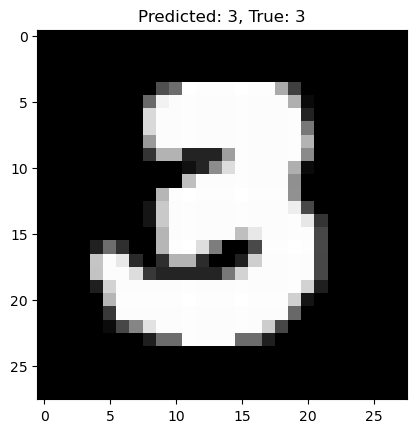

In [21]:
# Code it!
plt.imshow(test_features[loc], cmap='gray')
plt.title(f'Predicted: {predicted_digit}, True: {true_digit}')
plt.show()

And we did it! We helped Amelia create a model that can recognize handwritten digits!


## Bonus exercise

* Write a function that ties all these steps into one function call. The function should take an input image and print the image with the predicted digit and true digit.

## Before continuing
###  <img src='images/alert_icon.svg' alt="Alert icon" width=40 align=center> Alert!
> Before continuing to another notebook within the same Jupyter session,
> use the **"Running Terminals and Kernels" tab** (below the File Browser tab) to **shut down this kernel**. 
> This will free up this notebook's GPU memory, making it available for
> your next notebook.
>
> Every time you run multiple notebooks within a Jupyter session with a GPU, this should be done.
>
> ![Screenshot of the Running Terminals and Kernels tab used t oshut down kernels before starting a new notebook](images/stop_kernel.png)

----
## Push changes to GitHub <img src="images/push_to_github.png" alt="Push to GitHub icon" align="right" width=150>

 Remember to **add**, **commit**, and **push** the changes you have made to this notebook to GitHub to keep your repository in sync.

In Jupyter, those are done in the git tab on the left. In Google Colab, use File > Save a copy in GitHub.
